In [1]:
import csv
import numpy as np
from math import sqrt, pi, sin, cos
import matplotlib.pyplot as plt

#makes plots bigger and use Latex fonts
from matplotlib import rcParams
rcParams["figure.dpi"]=600
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.size'] = 14
rcParams['lines.linewidth'] = 2.5
rcParams['legend.framealpha'] = 1
rcParams['legend.edgecolor'] = 'k'

In [2]:
HBARC = 197.3269718
NEUTRON_MASS = 939.5653 / HBARC
PROTON_MASS = 938.272 / HBARC
NUCLEON_MASS = 2 * NEUTRON_MASS * PROTON_MASS / (NEUTRON_MASS + PROTON_MASS)
MUON_MASS = 105.7 / HBARC
ELECTRON_MASS = 0.511 / HBARC
GA = 1.267
MEVFM3_TO_GCM3 = 1.78e12
FM4_TO_DYNECM2 = 3.16e35
G_TO_FM = 7.69**2 / 10**16 / HBARC**2

In [3]:
#results csvs have cc of the form
#mean of n, stddev of n, mean of p, stddev of p, n, ndegen, p, pdegen, eB, T, mun, n, yp, knu, cost, ui

cc_filenames = ['./opacity csvs/cc' + elt + '.csv' for elt in ['2', '3', '4', '5', '6']]

data_arr = np.empty((45, 16))
counter = 0
for filename in cc_filenames:
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            for ix, elt in enumerate(row):
                if elt == '-Times-': 
                    row[ix] = 0
            data_arr[counter, :] = np.array([float(elt) for elt in row])
            counter += 1

In [13]:
sorted_data[1, -3] * HBARC

np.float64(1.5163035189807588)

<>:13: SyntaxWarning: invalid escape sequence '\k'
<>:23: SyntaxWarning: invalid escape sequence '\k'
<>:13: SyntaxWarning: invalid escape sequence '\k'
<>:23: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_428/3334936114.py:13: SyntaxWarning: invalid escape sequence '\k'
  ax1.set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')
/tmp/ipykernel_428/3334936114.py:23: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')


(1e-08, 0.001)

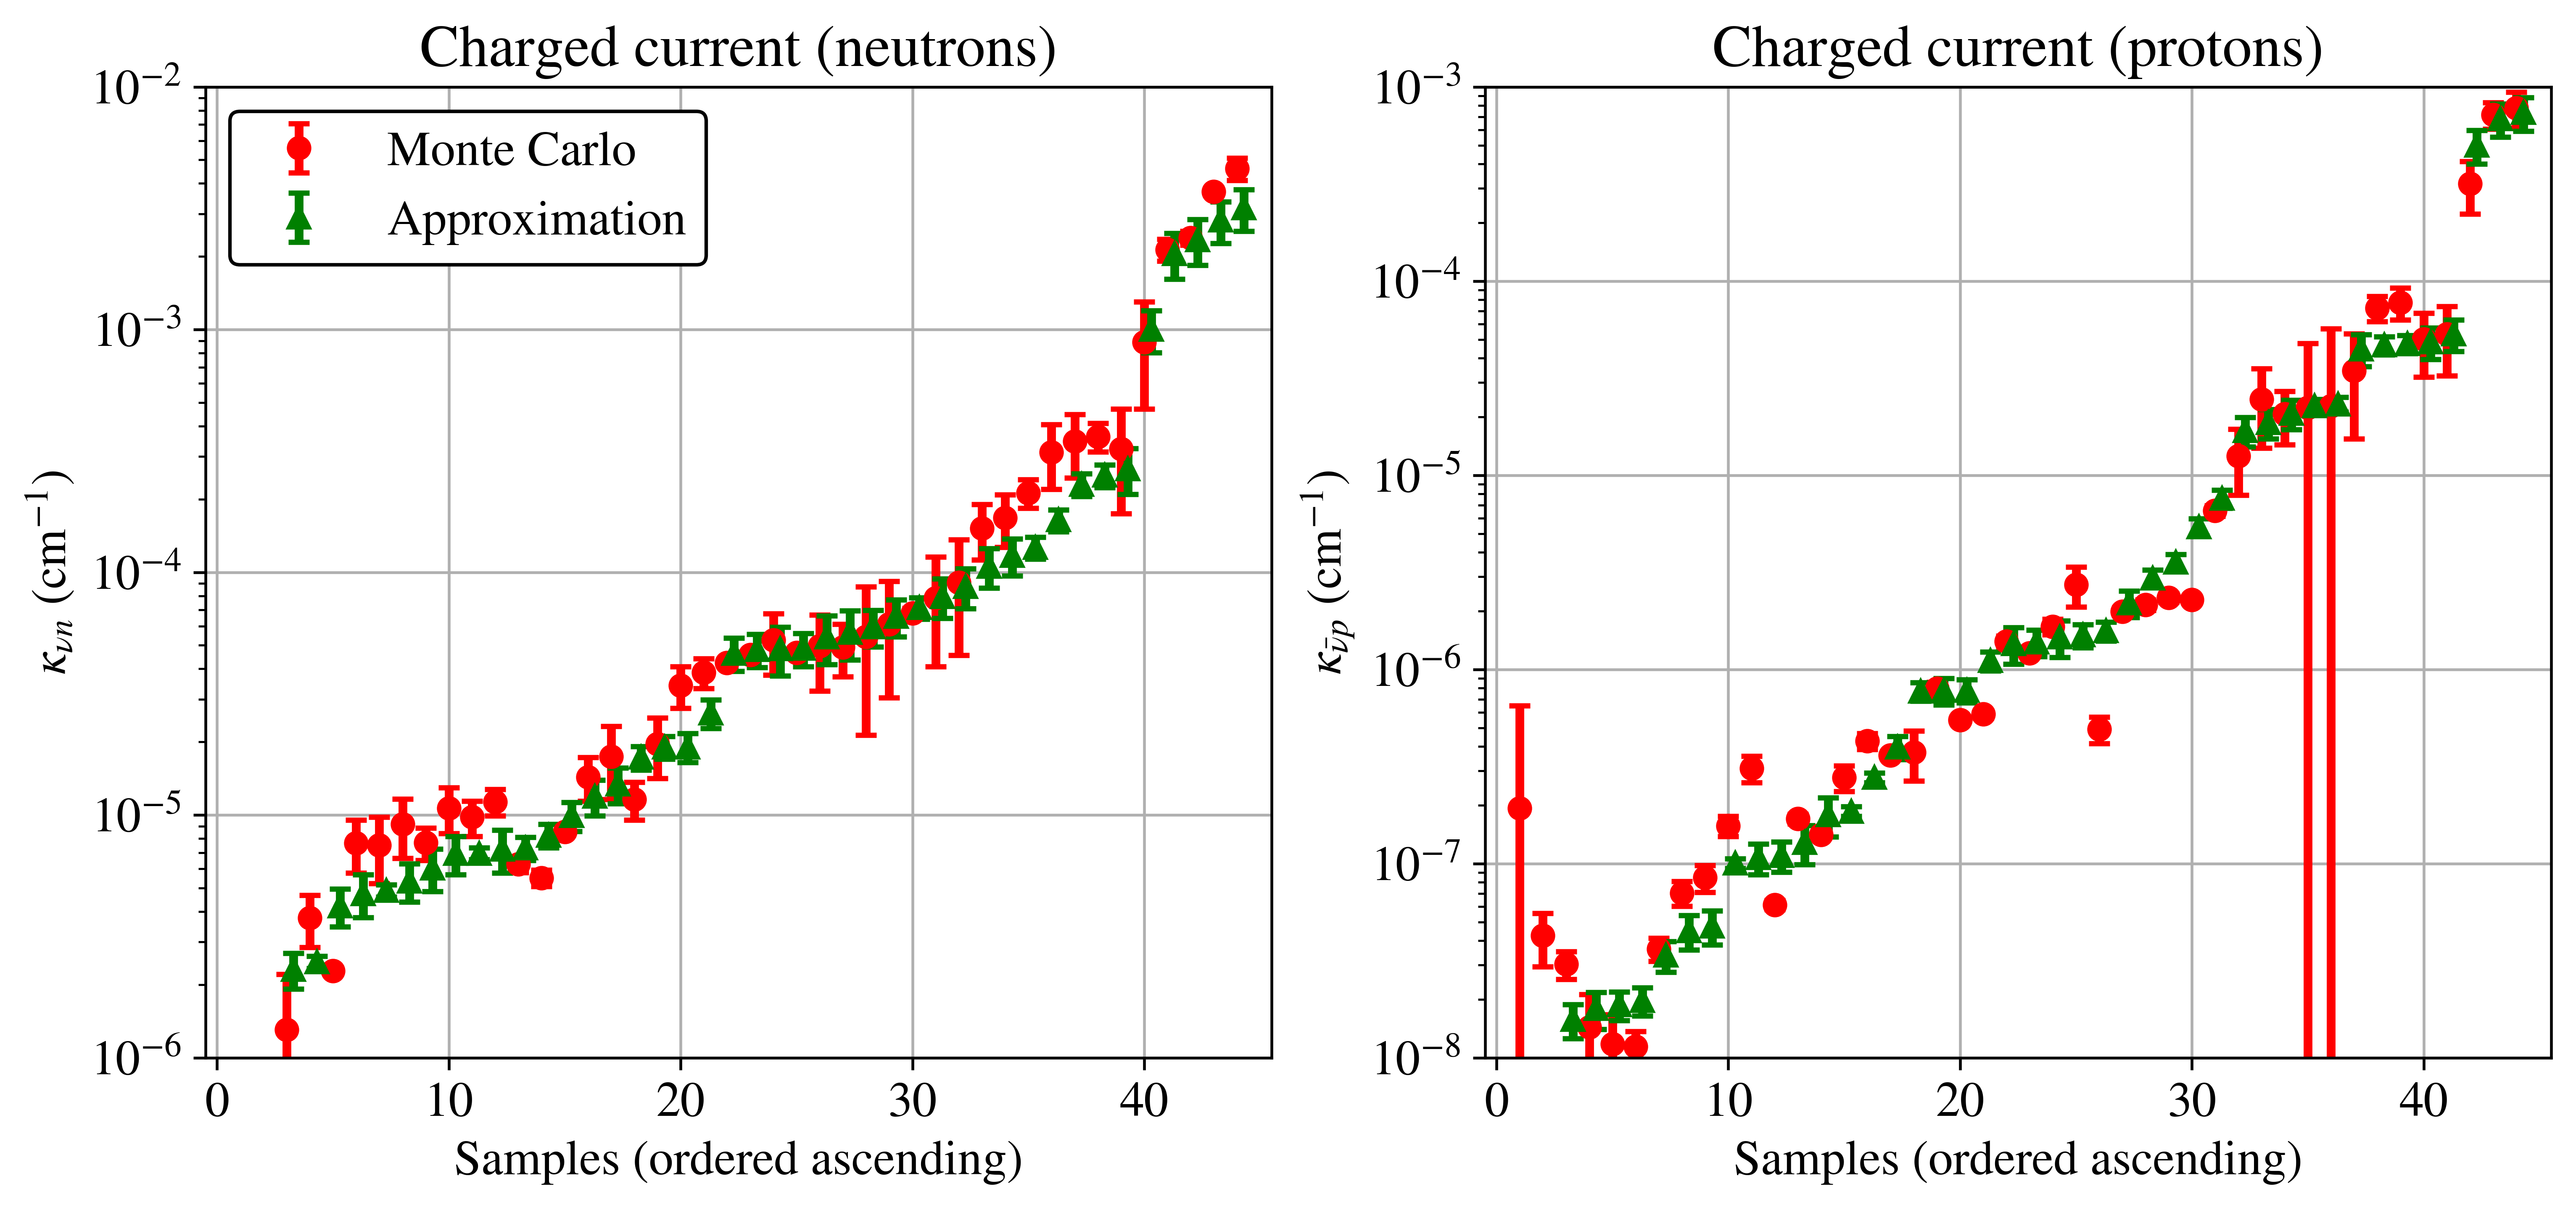

In [54]:
test_ix = 4
sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -100000
sorted_data = sorted_both[isdegen]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax
xpts = range(45)#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 0], sorted_data[:, 1], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 4], np.sqrt(sorted_data[:, 9] / NUCLEON_MASS) * sorted_data[:, 4], fmt = 'g^', capsize = 3, capthick = 1.5)
ax1.set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')

test_ix = 6
sorted_both = data_arr[np.argsort(data_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
sorted_data = sorted_both[isdegen]
xpts = range(45) #sorted_data[:, test_ix] * HBARC
ax2.errorbar(xpts, sorted_data[:, 2], sorted_data[:, 3], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 6], np.sqrt(sorted_data[:, 9] / NUCLEON_MASS) * sorted_data[:, 6], fmt = 'g^', capsize = 3, capthick = 1.5)
ax2.set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([-0.5, 45.5])
ax2.set_xlim([-0.5, 45.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Charged current (neutrons)')
ax2.set_title('Charged current (protons)')
ax1.set_ylim([1e-6, 1e-2])
ax2.set_ylim([1e-8, 1e-3])

In [109]:
#results csvs have cc of the form
#mean dn, std dev dn, mean n, std dev n, mean dp, std dev dp, mean p, std dev p, mean e, std dev e, dn, n, dndegen, ndegen, dp, p, e, eb, t, mue, nb, yp, k, cost, k', cost', phi

nc_filenames = ['./opacity csvs/nc' + elt + '.csv' for elt in ['1', '2', '3', '4', '5', '6']]

ncdata_arr = np.empty((54, 27))
counter = 0
for filename in nc_filenames:
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            for ix, elt in enumerate(row):
                if elt == '-Times-': 
                    row[ix] = 0
            ncdata_arr[counter, :] = np.array([float(elt) for elt in row])
            counter += 1

<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\k'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_428/4081424796.py:24: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$\partial^2 \kappa_{NCn}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{0}$)')
/tmp/ipykernel_428/4081424796.py:25: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{NCn}$ (cm$^{-1}$)')


(1e-08, 0.0001)

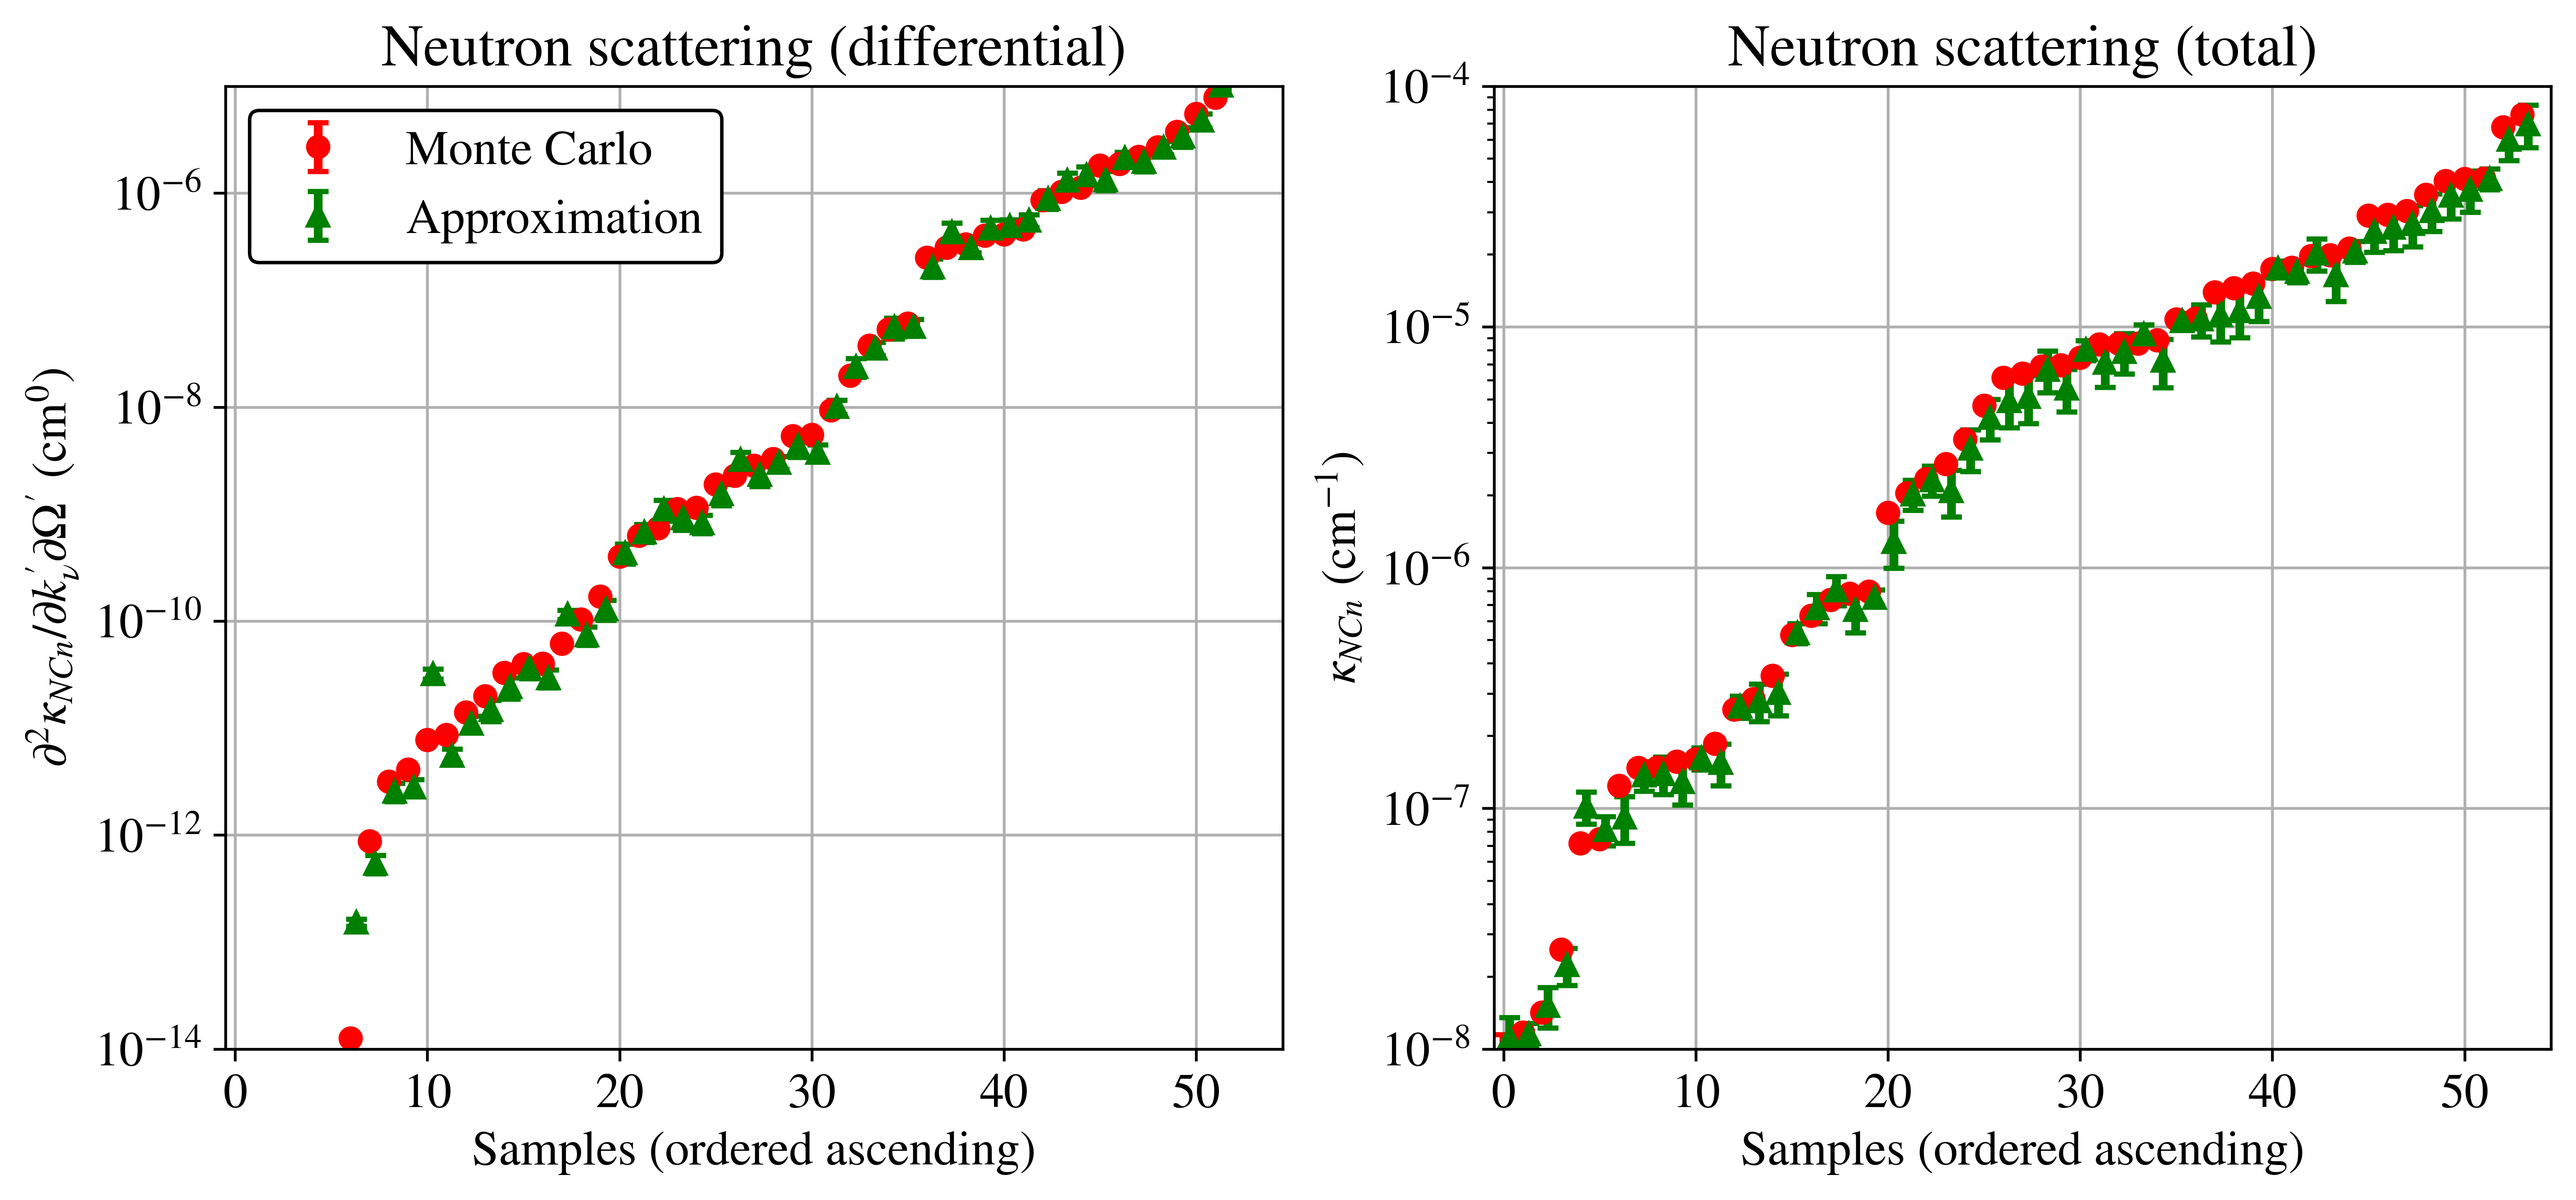

In [99]:
test_ix = 0
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -100000
sorted_data = sorted_both[isdegen]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax
xpts = range(54)#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 0], sorted_data[:, 1], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 10], np.sqrt(sorted_data[:, -9] / NUCLEON_MASS) * sorted_data[:, 10], fmt = 'g^', capsize = 3, capthick = 1.5)


test_ix = 2
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
sorted_data = sorted_both[isdegen]
xpts = range(54) #sorted_data[:, test_ix] * HBARC
ax2.errorbar(xpts, sorted_data[:, 2], sorted_data[:, 3], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 11], np.sqrt(sorted_data[:, -9] / NUCLEON_MASS) * sorted_data[:, 11], fmt = 'g^', capsize = 3, capthick = 1.5)

ax1.set_ylabel('$\partial^2 \kappa_{NCn}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{0}$)')
ax2.set_ylabel('$\kappa_{NCn}$ (cm$^{-1}$)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([-0.5, 54.5])
ax2.set_xlim([-0.5, 54.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Neutron scattering (differential)')
ax2.set_title('Neutron scattering (total)')
ax1.set_ylim([1e-14, 1e-5])
ax2.set_ylim([1e-8, 1e-4])

<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\k'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_428/1811032466.py:25: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$\partial^2 \kappa_{NCp}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{0}$)')
/tmp/ipykernel_428/1811032466.py:26: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{NCp}$ (cm$^{-1}$)')
/tmp/ipykernel_428/1811032466.py:18: RuntimeWarning: invalid value encountered in subtract
  isdegen = sorted_both[:, 6] - sorted_both[:, 7] > 0


Text(0.5, 1.0, 'Proton scattering (total)')

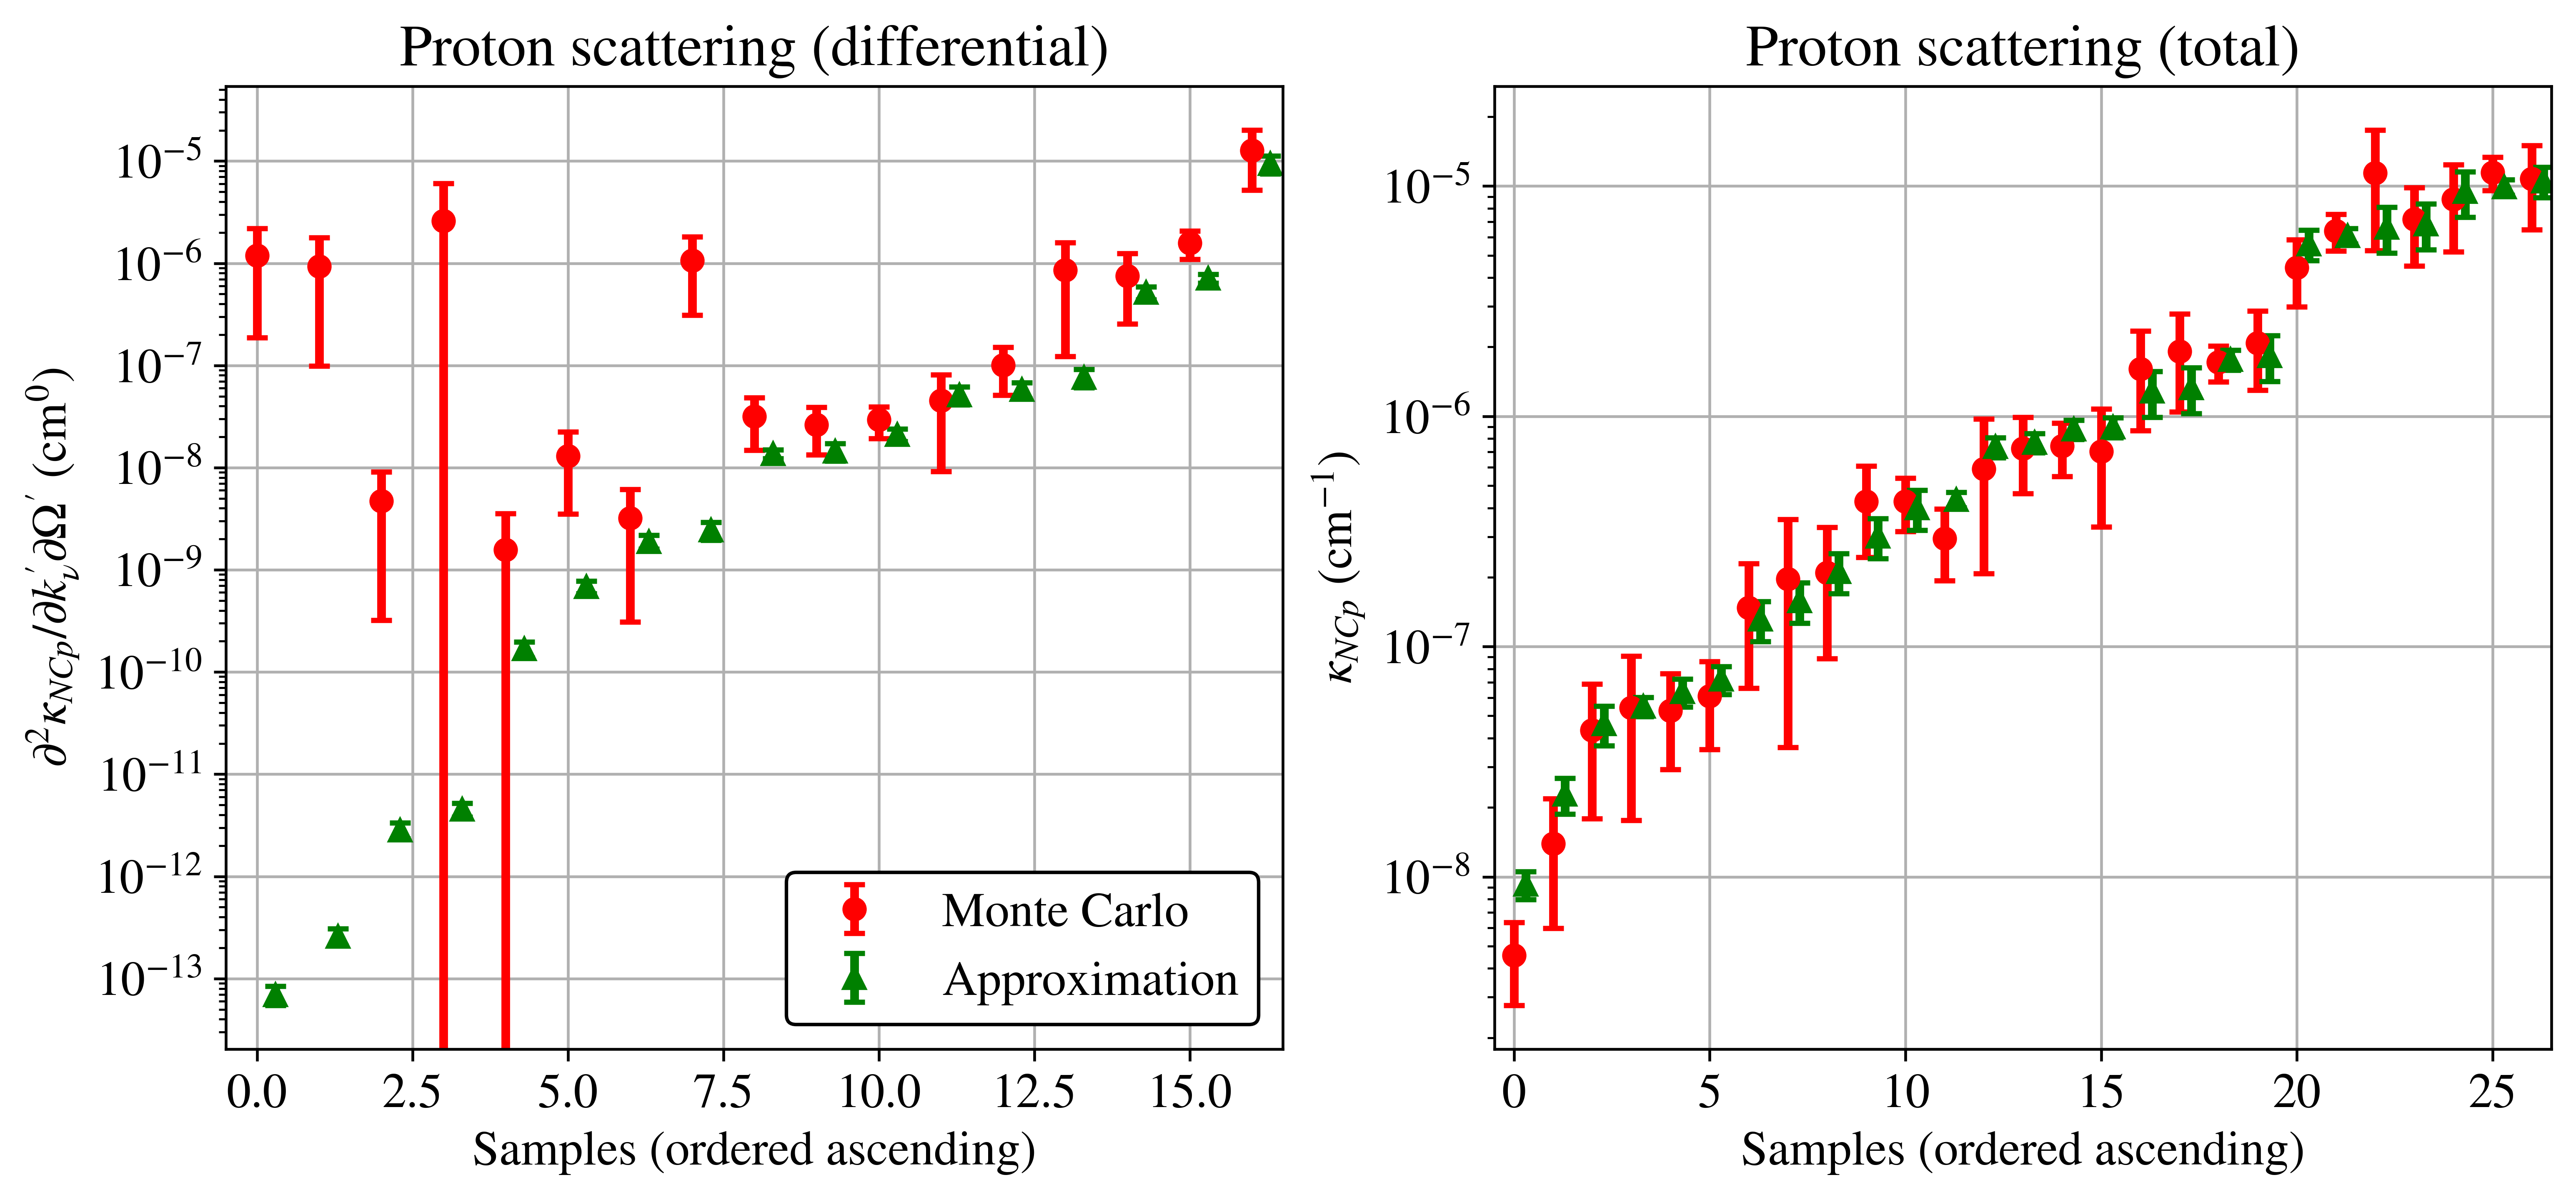

In [120]:
test_ix = 14
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = sorted_both[:, 4] - sorted_both[:, 3] > 0
sorted_data = sorted_both[isdegen]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax
xpts = range(np.sum(isdegen))#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 4], sorted_data[:, 5], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], 2 * sorted_data[:, 14], np.sqrt(sorted_data[:, -9] / NUCLEON_MASS) * 2 * sorted_data[:, 14], fmt = 'g^', capsize = 3, capthick = 1.5)
ax1.set_xlim([-0.5, np.sum(isdegen) - 0.5])


test_ix = 15
sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
isdegen = sorted_both[:, 6] - sorted_both[:, 7] > 0
sorted_data = sorted_both[isdegen]
xpts = range(np.sum(isdegen))
ax2.errorbar(xpts, sorted_data[:, 6], sorted_data[:, 7], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], 2 * sorted_data[:, 15], np.sqrt(sorted_data[:, -9] / NUCLEON_MASS) * 2 * sorted_data[:, 15], fmt = 'g^', capsize = 3, capthick = 1.5)

ax1.set_ylabel('$\partial^2 \kappa_{NCp}/\partial k^\prime_\\nu \partial \Omega^\prime$ (cm$^{0}$)')
ax2.set_ylabel('$\kappa_{NCp}$ (cm$^{-1}$)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.set_xlim([-0.5, np.sum(isdegen) - 0.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Proton scattering (differential)')
ax2.set_title('Proton scattering (total)')
#ax1.set_ylim([1e-15, 1e-5])
#ax2.set_ylim([1e-8, 1e-4])

<>:51: SyntaxWarning: invalid escape sequence '\k'
<>:52: SyntaxWarning: invalid escape sequence '\k'
<>:51: SyntaxWarning: invalid escape sequence '\k'
<>:52: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_428/4172705539.py:51: SyntaxWarning: invalid escape sequence '\k'
  ax1.set_ylabel('$\kappa_{NCe}$ (cm$^{-1}$)')
/tmp/ipykernel_428/4172705539.py:52: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{NCe}$ (cm$^{-1}$)')


(1e-10, 1e-06)

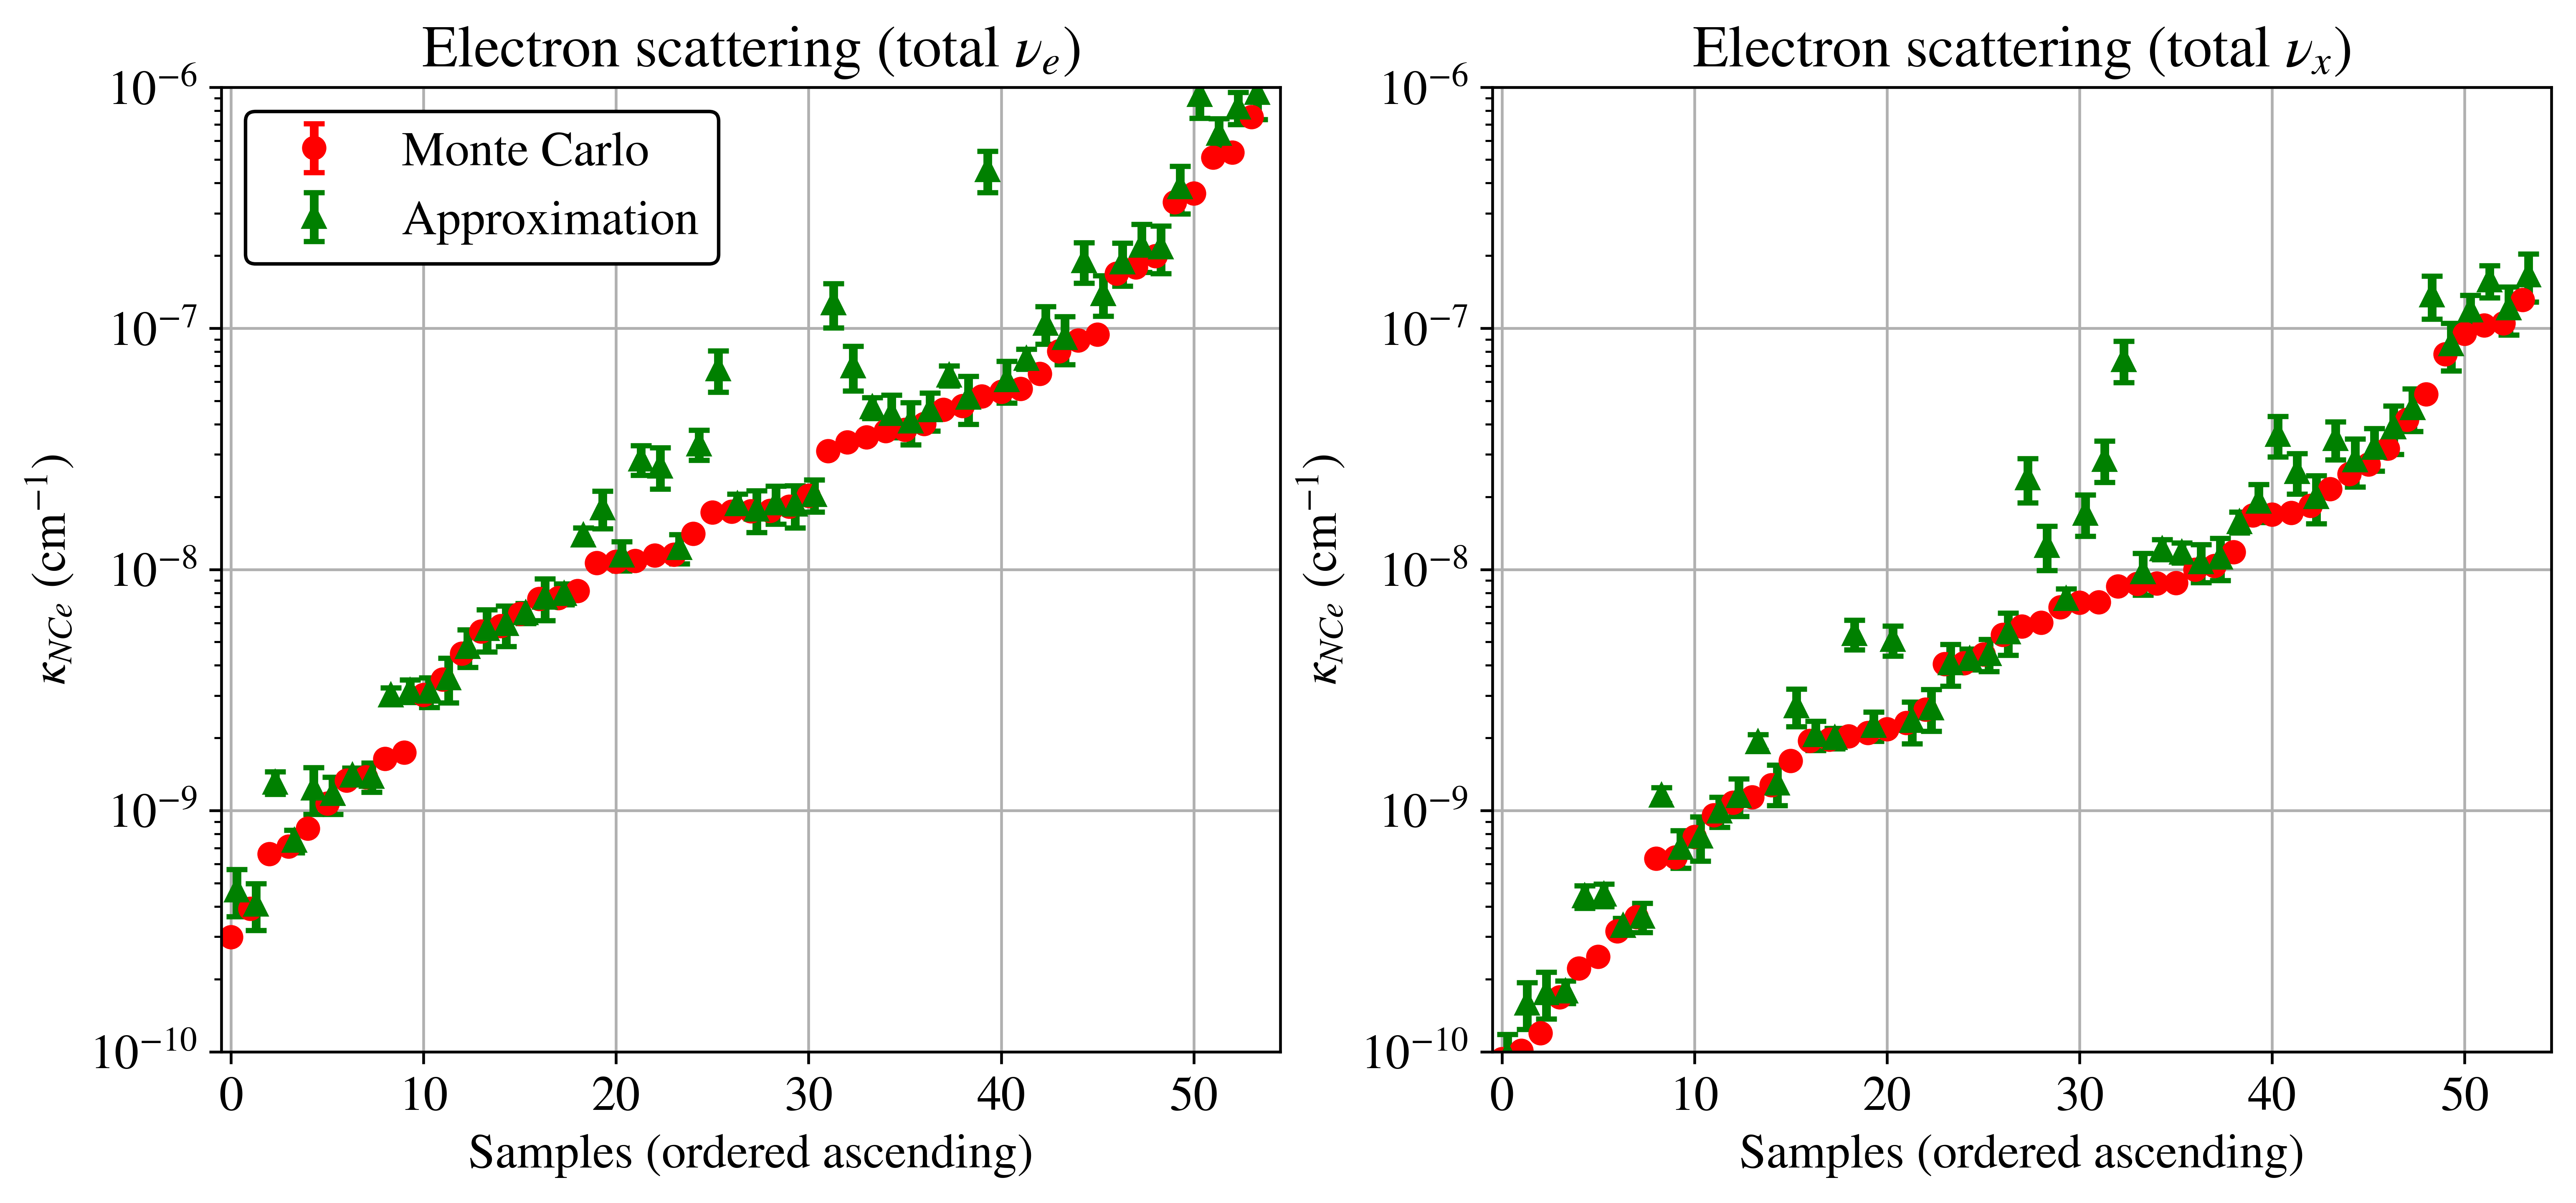

In [95]:
ncdata_arr = np.empty((54, 8))
counter = 0
with open("./opacity csvs/nce.csv", 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        for ix, elt in enumerate(row):
            if elt == '-Times-': 
                row[ix] = 0
        ncdata_arr[counter, :] = np.array([float(elt) for elt in row])
        counter += 1

test_ix = 0
sorted_data = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax
xpts = range(54)#sorted_data[:, test_ix] * HBARC
ax1.errorbar(xpts, sorted_data[:, 0], sorted_data[:, 1], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 2], np.sqrt(sorted_data[:, 4] / NUCLEON_MASS) * sorted_data[:, 2], fmt = 'g^', capsize = 3, capthick = 1.5)

ncdata_arr = np.empty((54, 8))
counter = 0
with open("./opacity csvs/ncx.csv", 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        for ix, elt in enumerate(row):
            if elt == '-Times-': 
                row[ix] = 0
        ncdata_arr[counter, :] = np.array([float(elt) for elt in row])
        counter += 1

test_ix = 0
sorted_data = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])]

xpts = range(54)#sorted_data[:, test_ix] * HBARC
ax2.errorbar(xpts, sorted_data[:, 0], sorted_data[:, 1], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax1.errorbar(range(isdegen.sum()), sorted_data[:, 0], sorted_data[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 2], np.sqrt(sorted_data[:, 4] / NUCLEON_MASS) * sorted_data[:, 2], fmt = 'g^', capsize = 3, capthick = 1.5)

#test_ix = 6
#sorted_both = ncdata_arr[np.argsort(ncdata_arr[:, test_ix])] #4
#isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1000000
#sorted_data = sorted_both[isdegen]
#xpts = range(54) #sorted_data[:, test_ix] * HBARC
#ax2.errorbar(xpts, sorted_data[:, 6], sorted_data[:, 7], fmt = 'ro', capsize = 3, capthick = 1.5)
#ax2.errorbar(range(isdegen.sum()), sorted_data[:, 2], sorted_data[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
#ax2.errorbar([elt + 0.3 for elt in xpts], sorted_data[:, 15], np.sqrt(sorted_data[:, -9] / NUCLEON_MASS) * sorted_data[:, 15], fmt = 'g^', capsize = 3, capthick = 1.5)

ax1.set_ylabel('$\kappa_{NCe}$ (cm$^{-1}$)')
ax2.set_ylabel('$\kappa_{NCe}$ (cm$^{-1}$)')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([-0.5, 54.5])
ax2.set_xlim([-0.5, 54.5])
#ax1.set_xticklabels([''])
#ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
ax1.set_xlabel('Samples (ordered ascending)')
ax2.set_xlabel('Samples (ordered ascending)')
#fig.suptitle('Non-degenerate neutrons', fontsize = 24, y = 0.95)
ax1.set_title('Electron scattering (total $\\nu_e$)')
ax2.set_title('Electron scattering (total $\\nu_x$)')
ax1.set_ylim([1e-10, 1e-6])
ax2.set_ylim([1e-10, 1e-6])